In [1]:
import numpy as np
import matplotlib.pylab as plt
import cv2

## Drop/Crop random patches

In [4]:
def drop_random(img_name, img_total_patches = 10, noise_ratio = 0.3, img_dir = "../people_segmentation/original/images", mask_dir = "../people_segmentation/original/masks", return_img = False):
    image = cv2.imread(f'{img_dir}/{img_name}.jpg')
    mask = cv2.imread(f'{mask_dir}/{img_name}.png') > 0
    mask = mask.astype(float)

    img_patch_size_y = image.shape[0]//img_total_patches
    img_patch_size_x = image.shape[1]//img_total_patches

    n_noise_patches = int(img_total_patches*img_total_patches*noise_ratio)
    noise_img = np.zeros((img_patch_size_y, img_patch_size_x, 3))
    for i in range(n_noise_patches):
        x_offset = int(np.random.uniform(0, image.shape[1]-img_patch_size_x-1))
        y_offset = int(np.random.uniform(0, image.shape[0]-img_patch_size_y-1))
        image[y_offset:y_offset+noise_img.shape[0], x_offset:x_offset+noise_img.shape[1]] = noise_img
        mask[y_offset:y_offset+noise_img.shape[0], x_offset:x_offset+noise_img.shape[1]] = noise_img
    if return_img:
            return [image, mask]
    else:
        plt.imsave(f'../people_segmentation/{noise_ratio}/random_cropped/images/{img_name}.jpg', image) # save new image
        plt.imsave(f'../people_segmentation/{noise_ratio}/random_cropped/masks/{img_name}.png', mask) # save new mask

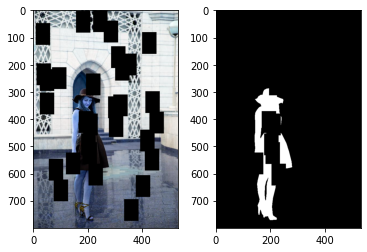

In [3]:
im, mask = drop_random(img_name="pexels-photo-219604", return_img = True)
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(mask)

## Drop/Crop fixed patches

In [5]:
import random

def drop_patches(img_name, img_total_patches = 10, noise_ratio = 0.3, img_dir = "../people_segmentation/original/images", mask_dir = "../people_segmentation/original/masks", return_img = False):
    image = cv2.imread(f'{img_dir}/{img_name}.jpg')
    mask = cv2.imread(f'{mask_dir}/{img_name}.png') > 0
    mask = mask.astype(float)

    img_patch_size_y = image.shape[0]//img_total_patches
    img_patch_size_x = image.shape[1]//img_total_patches

    n_noise_patches = int(img_total_patches*img_total_patches*noise_ratio)
    noise_img = np.zeros((img_patch_size_y, img_patch_size_x, 3))

    for i in range(n_noise_patches):
        patch_n_x = random.choice(list(range(img_total_patches)))
        patch_n_y = random.choice(list(range(img_total_patches)))
        x_offset = int(img_patch_size_x*patch_n_x)
        y_offset = int(img_patch_size_y*patch_n_y)

        # apply same transformation to image and its mask
        image[y_offset:y_offset+noise_img.shape[0], x_offset:x_offset+noise_img.shape[1]] = noise_img
        mask[y_offset:y_offset+noise_img.shape[0], x_offset:x_offset+noise_img.shape[1]] = noise_img

    if return_img:
        return [image, mask]
    else:
        plt.imsave(f'../people_segmentation/{noise_ratio}/patch_cropped/images/{img_name}.jpg', image) # save new image
        plt.imsave(f'../people_segmentation/{noise_ratio}/patch_cropped/masks/{img_name}.png', mask) # save new mask


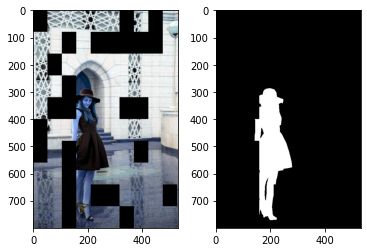

In [6]:
im, mask = drop_patches(img_name="pexels-photo-219604", return_img = True)
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(mask)


## Apply on whole dataset

Patch density = 0.3 (30%)
Total patches = 10

In [164]:
import os

for root, dirs, files in os.walk("../people_segmentation/original/images/", topdown=False):
    for img_name in files:
        drop_patches(img_name[:-4])
        drop_random(img_name[:-4])

Patch density = 0.5 (50%)
Total patches = 10

In [10]:
import os

for root, dirs, files in os.walk("../people_segmentation/original/images/", topdown=False):
    for img_name in files:
        drop_patches(img_name[:-4], noise_ratio=0.5)
        drop_random(img_name[:-4], noise_ratio=0.5)

In [11]:
import os

for root, dirs, files in os.walk("../people_segmentation/original/images/", topdown=False):
    for img_name in files:
        drop_patches(img_name[:-4], noise_ratio=0.7)
        drop_random(img_name[:-4], noise_ratio=0.7)